In [1]:
%load_ext autoreload
%autoreload 2 

import numpy as np
%matplotlib inline


In [2]:
# from re1_utils.camera import get_rs_extrinsic_mat
# extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
from re1_utils.camera import get_rs_intrinsic_mat
intrinsic_mat = get_rs_intrinsic_mat()
print(intrinsic_mat)
inv_intrinsic_mat = np.linalg.inv(intrinsic_mat)
print(inv_intrinsic_mat)
from re1_utils.camera import get_rs_extrinsic_mat
inv_extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
print(inv_extrinsic_mat)


[[606.46295166   0.         323.97521973]
 [  0.         606.402771   234.81144714]
 [  0.           0.           1.        ]]
[[ 0.00164891  0.         -0.53420447]
 [ 0.          0.00164907 -0.38722027]
 [ 0.          0.          1.        ]]
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[ 0.98966507 -0.06517314  0.12773222  0.01257551]
 [ 0.12879091  0.01229289 -0.99159558  0.02102222]
 [ 0.0630552   0.99779825  0.02055955  1.32158661]
 [ 0.          0.          0.          1.        ]]


In [15]:
from POI.object_of_interest import OOI
pred =np.array(
[[         70         479         116         628     0.89845          39]
 [        199         492         249         633     0.87461          39]
 [        218         256         258         367     0.34034          39]
)
depths = [1.2018723487854004, 1.1422603130340576, 1.3461313247680664]
all_objects = []
for i in range(pred.shape[0]):
    coord = pred[i, :]
    obj = OOI(
        img_coord = np.array([(coord[2]+coord[0])/2,(coord[3]+coord[1])/2]), 
        depth = depths[i],
        obj_class = int(coord[-1]),
        obj_atributes = 'None', 
        bbox = ((coord[0],coord[1]),(coord[2],coord[3])),
        conf_score = coord[4],
        eid = i
    )
    all_objects.append(obj)

In [16]:
landmarks = {'locations': {}, 'objects': {}}
for i, object in enumerate(all_objects):
    landmarks['objects'][i] = object
    landmarks['objects'][i].set_cam_coord(inv_intrinsic_mat)
    landmarks['objects'][i].set_world_coord(inv_extrinsic_mat)

In [20]:
for i, object in enumerate(all_objects):
    print(landmarks['objects'][i].obj_name, landmarks['objects'][i].img_coord[:-1])
    print(landmarks['objects'][i].temp_cam_coord)
    print(landmarks['objects'][i].cam_coord,landmarks['objects'][i].base_coord)
    

bottle [ 39.  537.5]
[-0.55005985  0.58430815  1.17059624]
[-0.58430815  0.55005985 -1.17059624] [-0.64281332  1.16932782  1.82862481]
bottle [173. 541.]
[-0.30069887  0.60989935  1.20789838]
[-0.60989935  0.30069887 -1.20789838] [-0.66118437  1.20129449  1.5778901 ]
bottle [186.5 293. ]
[-0.31226265  0.1321832   1.37752628]
[-0.1321832   0.31226265 -1.37752628] [-0.19230521  1.39271996  1.60296376]


In [21]:
from planning.path_planner import PathPlanner
path_planner = PathPlanner(landmark_dict=landmarks)

#z is height, upwards
#y is depth distance, forwards

(-0.642813320957718, 1.8286248115702397)
(-0.6611843660156295, 1.57789009967874)
(-0.1923052085813946, 1.6029637584783119)


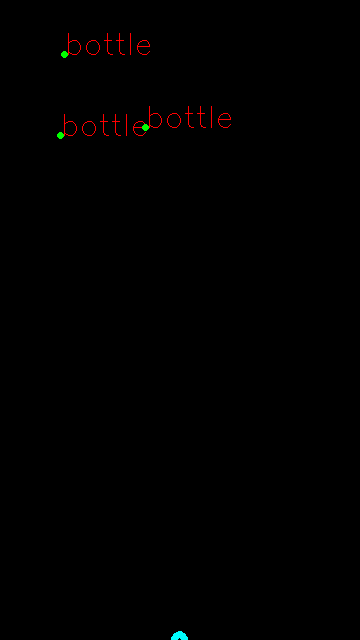

In [22]:
path_planner.viz_base(coord_type='xz')


(-0.6037338942990423, 1.1511367715657013)
(-0.6398209828785149, 1.1913500670112558)
(-0.17012026762516808, 1.3823931145483426)


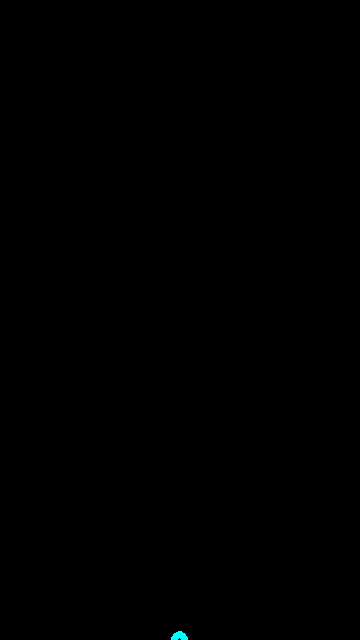

In [11]:
path_planner.viz_base(coord_type='xy')